## Image Classification

Bilder aufteilen in zwei Gruppen

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf

In [18]:
data = tf.keras.utils.image_dataset_from_directory("Data/Images/")

Found 175 files belonging to 2 classes.


## Batches

Ein Batch ist ein 32 Image großes Datenset

In [4]:
data.as_numpy_iterator().next()  # 4D Numpy Array

(array([[[[1.73509888e+02, 1.16509880e+02, 2.75098801e+01],
          [1.89337311e+02, 1.34610870e+02, 4.46108704e+01],
          [1.92599609e+02, 1.38986328e+02, 4.88574219e+01],
          ...,
          [2.21945312e+02, 1.70074219e+02, 4.76875000e+01],
          [2.20978745e+02, 1.68949097e+02, 5.09514008e+01],
          [2.32986328e+02, 1.77986328e+02, 6.19726562e+01]],
 
         [[1.70142914e+02, 1.13142921e+02, 2.41429214e+01],
          [1.85572845e+02, 1.30572845e+02, 4.05728455e+01],
          [1.91597412e+02, 1.37984131e+02, 4.78552322e+01],
          ...,
          [2.17937836e+02, 1.65979431e+02, 4.35979919e+01],
          [2.19527344e+02, 1.65306976e+02, 4.73929214e+01],
          [2.31589844e+02, 1.76548828e+02, 5.94667969e+01]],
 
         [[1.67020294e+02, 1.10020294e+02, 2.10202942e+01],
          [1.80715652e+02, 1.25715652e+02, 3.57156525e+01],
          [1.91175827e+02, 1.37536102e+02, 4.74160156e+01],
          ...,
          [2.15937500e+02, 1.61809601e+02, 3.9474

In [6]:
data.as_numpy_iterator().next()[0].shape  # 32: Anz Images pro Batch, 256x256: Image Größe, 3: Labels

(32, 256, 256, 3)

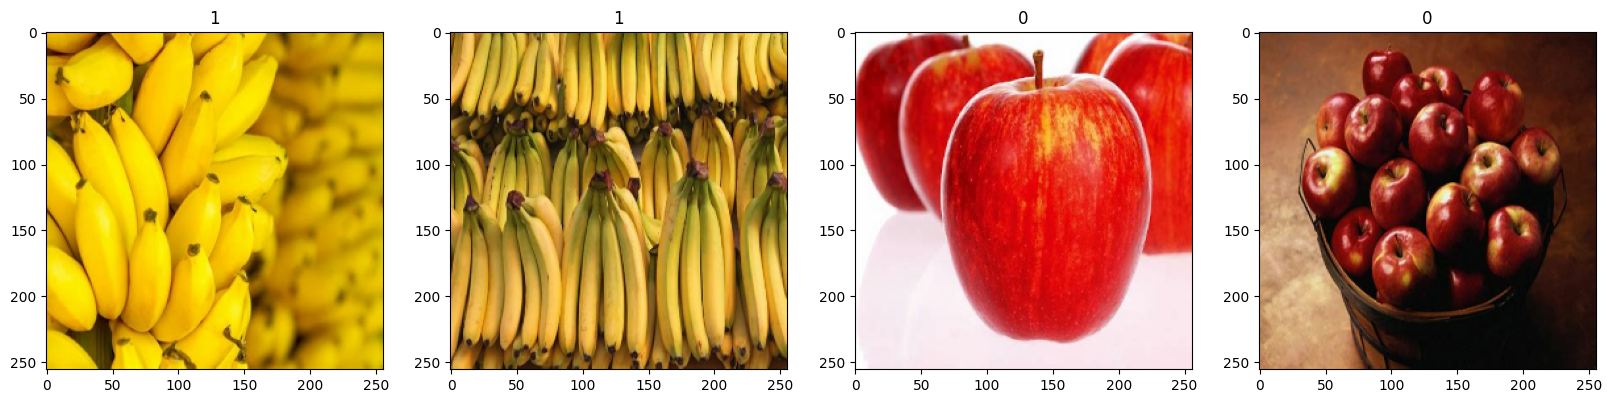

In [12]:
fig, axis = plt.subplots(ncols=4, figsize=(20, 5))
batch = data.as_numpy_iterator().next()
i = 0
for img in batch[0][:4]:
    axis[i].imshow(img.astype(int))
    axis[i].title.set_text(batch[1][i])
    i += 1

## Daten skalieren

In [19]:
data = data.map(lambda x, y: (x / 255, y))  # X: Das Image, Y: Die Labels

In [20]:
data.as_numpy_iterator().next()

(array([[[[9.46404219e-01, 7.19339669e-01, 8.84435326e-03],
          [8.55031312e-01, 5.90769708e-01, 1.42181991e-02],
          [5.22601902e-01, 2.14268580e-01, 0.00000000e+00],
          ...,
          [9.76679921e-01, 7.34061420e-01, 1.80749036e-02],
          [9.53165472e-01, 7.20832705e-01, 8.94547999e-03],
          [9.36477125e-01, 7.12515295e-01, 2.29779421e-03]],
 
         [[9.52753067e-01, 7.23422766e-01, 8.65442585e-03],
          [8.74643505e-01, 6.09617114e-01, 2.92555857e-02],
          [5.78443229e-01, 2.77707934e-01, 0.00000000e+00],
          ...,
          [9.66531932e-01, 7.33158708e-01, 3.51961032e-02],
          [9.35844362e-01, 7.07611561e-01, 2.04509664e-02],
          [9.10978556e-01, 6.94505513e-01, 1.27144605e-02]],
 
         [[9.96543109e-01, 7.68346667e-01, 3.30811739e-02],
          [9.32178080e-01, 6.63694739e-01, 6.15622140e-02],
          [7.16069698e-01, 4.30152684e-01, 1.60127524e-02],
          ...,
          [9.23243642e-01, 7.06903815e-01, 3.0305

In [33]:
gesamt = len(data)
trainingLen = int(gesamt * 0.6)
validLen = int(gesamt * 0.2) + trainingLen
testLen = int(gesamt * 0.2) + trainingLen

In [34]:
training = data.take(trainingLen)
valid = data.skip(trainingLen).take(validLen)
test = data.skip(trainingLen + validLen).take(testLen)

In [38]:
train = data.take(4)
valid = data.take(2)

## Model bauen

Weitere Layer:
- Conv2D Layer: Verwendet einen Scanner (2x2, 3x3, 4x4, ...) und scannt das Image
- MaxPooling2D: Glättet das Ergebnis des Scanvorganges vom vorherigen Prozess (Conv2D)
- Flatten: Glättet den vorherigen Layer zu einem 1D Layer

In [40]:
model = tf.keras.Sequential([
        tf.keras.layers.Conv2D(4, (3, 3), activation="relu", input_shape=(256, 256, 3)),  # 3x3 Scanner schaut sich in den 9 Pixeln die Farbe an, und baut diese zu einem neuen Image zusammen
        tf.keras.layers.MaxPooling2D(),  # Zusammenbauen
        tf.keras.layers.Conv2D(4, (3, 3), activation="relu", input_shape=(256, 256, 3)),
        tf.keras.layers.MaxPooling2D(),
        tf.keras.layers.Conv2D(4, (3, 3), activation="relu", input_shape=(256, 256, 3)),
        tf.keras.layers.MaxPooling2D(),
        tf.keras.layers.Flatten(),
        tf.keras.layers.Dense(32, activation="relu"),
        tf.keras.layers.Dense(1, activation="sigmoid")
    ])

In [41]:
model.compile(optimizer=tf.keras.optimizers.Adam(0.001), loss="binary_crossentropy", metrics=["accuracy"])

In [42]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 254, 254, 4)       112       
                                                                 
 max_pooling2d (MaxPooling2  (None, 127, 127, 4)       0         
 D)                                                              
                                                                 
 conv2d_1 (Conv2D)           (None, 125, 125, 4)       148       
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 62, 62, 4)         0         
 g2D)                                                            
                                                                 
 conv2d_2 (Conv2D)           (None, 60, 60, 4)         148       
                                                                 
 max_pooling2d_2 (MaxPoolin  (None, 30, 30, 4)         0

In [43]:
model.fit(train, epochs=10, verbose=1, validation_data=valid)

Epoch 1/10


4/4 [==============================] - 2s 134ms/step - loss: 0.7199 - accuracy: 0.5938 - val_loss: 0.7068 - val_accuracy: 0.5000
Epoch 2/10
4/4 [==============================] - 0s 77ms/step - loss: 0.6692 - accuracy: 0.5312 - val_loss: 0.5910 - val_accuracy: 0.9219
Epoch 3/10
4/4 [==============================] - 0s 80ms/step - loss: 0.5394 - accuracy: 0.7266 - val_loss: 0.4933 - val_accuracy: 0.6562
Epoch 4/10
4/4 [==============================] - 0s 78ms/step - loss: 0.4462 - accuracy: 0.7891 - val_loss: 0.3787 - val_accuracy: 0.9375
Epoch 5/10
4/4 [==============================] - 0s 77ms/step - loss: 0.3388 - accuracy: 0.9531 - val_loss: 0.3052 - val_accuracy: 0.8750
Epoch 6/10
4/4 [==============================] - 0s 76ms/step - loss: 0.2801 - accuracy: 0.8906 - val_loss: 0.3110 - val_accuracy: 0.8594
Epoch 7/10
4/4 [==============================] - 0s 77ms/step - loss: 0.2144 - accuracy: 0.9375 - val_loss: 0.2002 - val_accuracy: 0.9844
Epoch 8/10
4/4 [========

In [44]:
import cv2

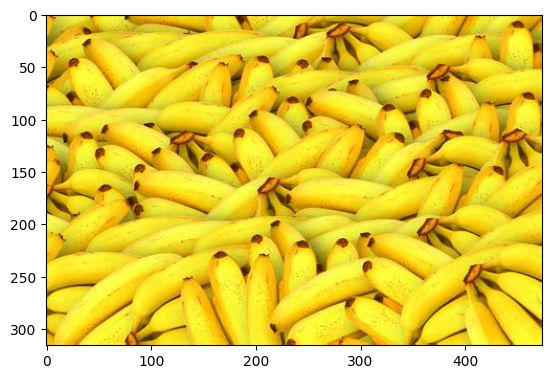

In [56]:
img = cv2.imread("Data/Images/banana/proxy-image(89).jpg")
plt.imshow(np.flip(img, axis=-1))
plt.show()

In [57]:
resize = tf.image.resize(img, (256, 256))

In [58]:
prediction = model.predict(np.expand_dims(resize / 255, 0))

1/1 [==============================] - 0s 29ms/step


In [59]:
print(prediction)
if prediction >= 0.5:
    print("Banane")
else:
    print("Apfel")

[[0.61892784]]
Banane
